In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [101]:

# Step 2: Generate a simple 2D dataset
# make_classification automatically makes synthetic data for classification
X, y = make_classification(
    n_samples=1000,      # total number of examples (m)
    n_features=2,       # two features so we can plot them in 2D
    n_informative=2,    # both features actually affect the output
    n_redundant=0,      # no extra useless features
    n_clusters_per_class=1, # one cluster per class
    random_state=1
)


In [102]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [103]:
def compute_model(x , w , b):
    return sigmoid(x @ w + b)

In [104]:
def predict(x , w , b, threshold=0.5):
    probs = compute_model(x , w, b)
    return (probs >= threshold).astype(int)

In [105]:
def compute_cost(x , y , w , b):
    probs = compute_model(x ,w , b)
    m = len(y)
    cost =  - (1 / m) * np.sum(y*np.log(probs + 1e-15) + ( 1 - y)*np.log(1-probs + 1e-15))
    return cost

In [106]:
def compute_gradients(x , y , w , b):
    m = len(y)
    prob = compute_model(x , w , b)
    error = prob - y
    dj_dw = (1/m) * (x.T @ error)
    dj_db = (1/m) * np.sum(error)
    return dj_dw , dj_db

In [107]:
def gradient_descent(x , y , w , b, alpha, itaration):
    cost_history = []
    for i in range(itaration):
        dj_dw , dj_db = compute_gradients(x , y , w , b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i%100 == 0:
            cost = compute_cost(x , y, w, b)
            print(f"Intaration:{i} , cost:{cost}")
            cost_history.append(cost)
    return w , b, cost_history

Intaration:0 , cost:0.6829226328962145
Intaration:100 , cost:0.3905197499781178
Intaration:200 , cost:0.344693394590006
Intaration:300 , cost:0.32532847757544603
Intaration:400 , cost:0.3141960040557967
Intaration:500 , cost:0.30690895392529627
Intaration:600 , cost:0.3018196077604738
Intaration:700 , cost:0.29812856336878624
Intaration:800 , cost:0.29538342886323565
Intaration:900 , cost:0.2933033408943554
Intaration:1000 , cost:0.29170362113983983
Intaration:1100 , cost:0.2904581138708628
Intaration:1200 , cost:0.28947822243760973
Intaration:1300 , cost:0.2887003596533889
Intaration:1400 , cost:0.28807805516185647
Intaration:1500 , cost:0.2875768147288937
Intaration:1600 , cost:0.28717068140823493
Intaration:1700 , cost:0.2868398845045008
Intaration:1800 , cost:0.28656920184196005
Intaration:1900 , cost:0.28634679978189065
Intaration:2000 , cost:0.2861633991730099
Intaration:2100 , cost:0.28601166737537276
Intaration:2200 , cost:0.2858857694848038
Intaration:2300 , cost:0.28578103324

/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_85860/1956357355.py:2: RuntimeWarning: divide by zero encountered in matmul
  return sigmoid(x @ w + b)
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_85860/1956357355.py:2: RuntimeWarning: overflow encountered in matmul
  return sigmoid(x @ w + b)
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_85860/1956357355.py:2: RuntimeWarning: invalid value encountered in matmul
  return sigmoid(x @ w + b)


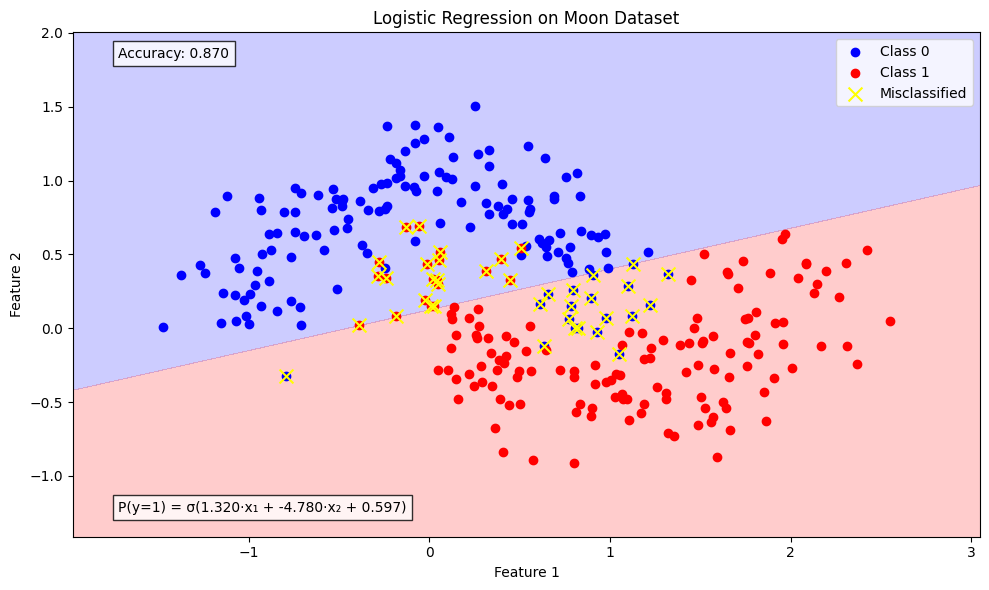

In [124]:
# Create a more challenging dataset
from sklearn.datasets import make_moons, load_breast_cancer
import matplotlib.pyplot as plt

# Generate a more challenging non-linear dataset (moons)
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)
# X , y = X_moons , y_moons
# Train the model on this dataset
w_moons, b_moons, _ = gradient_descent(X, y, np.zeros(2), 0.0, alpha=0.1, itaration=5000)

# Evaluate model accuracy
y_pred_moons = predict(X, w_moons, b_moons)
accuracy = np.mean(y_pred_moons == y)

# Create decision boundary visualization
plt.figure(figsize=(10, 6))

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = compute_model(grid, w_moons, b_moons).reshape(xx.shape)
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])

# Plot data points
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 1')

# Highlight misclassified points
misclassified = X[y != y_pred_moons]
plt.scatter(misclassified[:, 0], misclassified[:, 1], color='yellow', 
            marker='x', s=100, label='Misclassified')

# Add model equation on plot
equation = f"P(y=1) = σ({w_moons[0]:.3f}·x₁ + {w_moons[1]:.3f}·x₂ + {b_moons:.3f})"
plt.text(0.05, 0.05, equation, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add accuracy on plot
plt.text(0.05, 0.95, f"Accuracy: {accuracy:.3f}", transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.title("Logistic Regression on Moon Dataset")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()